In [1]:
import os
# Change the working directory to the project's root
project_root = os.path.dirname(os.getcwd())
os.chdir(project_root)

In [4]:
import numpy as np
import pandas as pd
from feature_formation.feat_split import *
from model_files.load_feats import *

feat_m = meteo_list + ['vol'] + features_dict['micorfs_m']

pca_h = X_train.filter(regex='^pca_h_').columns.tolist()
feat_h = meteo_list + ['vol_lidar'] + pca_h

feat_m_l = meteo_list + ['vol_lidar_m'] + features_dict['micorfs_m']
feat_h_m = meteo_list + ['vol'] + pca_h

result_21_m = pd.read_csv('model_test_21/model_scores/gpr_scores_21_m.csv',index_col=0,header=0)
result_21_h = pd.read_csv('model_test_21/model_scores/gpr_scores_21_h.csv',index_col=0,header=0)
result_21_m_l = pd.read_csv('model_test_21/model_scores/gpr_scores_21_m_l.csv',index_col=0,header=0)
result_21_h_m = pd.read_csv('model_test_21/model_scores/gpr_scores_21_h_m.csv',index_col=0,header=0)

mean_result_m = result_21_m.groupby('n_train_2021_plots').mean()
mean_result_h = result_21_h.groupby('n_train_2021_plots').mean()
mean_result_m_l = result_21_m_l.groupby('n_train_2021_plots').mean()
mean_result_h_m = result_21_h_m.groupby('n_train_2021_plots').mean() 

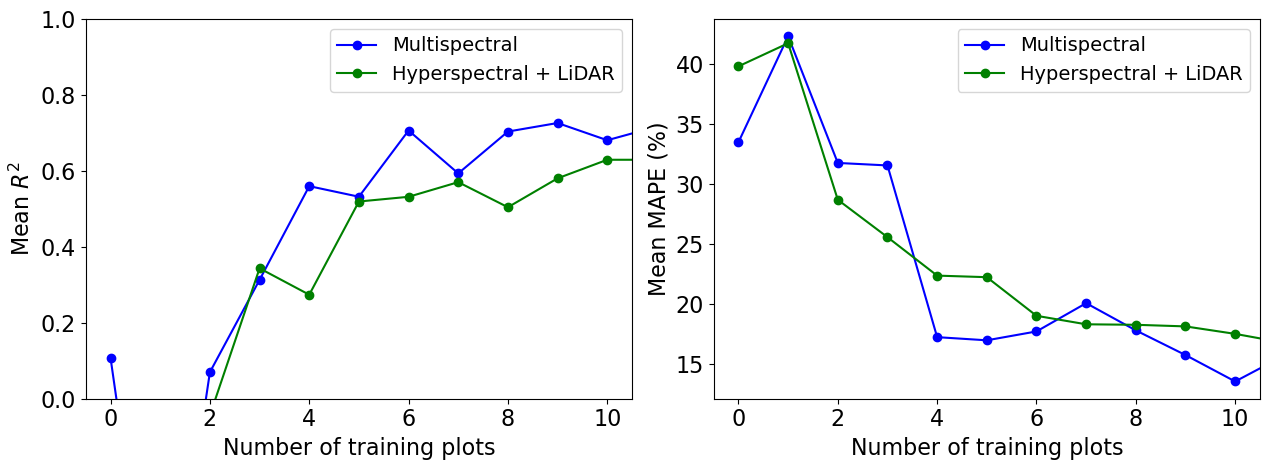

In [5]:
import matplotlib.pyplot as plt

def plot_combined_performance(results, labels, feat1='r2_test_21', feat2='mape_test_21', fontsize=16):
    """
    Plot combined performance of multiple results on the same axes.

    Parameters:
    - results (list of pd.DataFrame): List of result DataFrames to plot.
    - labels (list of str): List of labels for each result.
    - feat1 (str): The feature to plot on the first axis.
    - feat2 (str): The feature to plot on the second axis.
    - fontsize (int): Font size for the labels and title.
    """
    num_rows = 1
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6.4 * num_cols, 4.8 * num_rows))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors for different plots

    for i, (result, label) in enumerate(zip(results, labels)):
        color = colors[i % len(colors)]
        axs[0].plot(result[feat1].index, result[feat1], marker='o', label=label, color=color)
        axs[1].plot(result[feat2].index, result[feat2] * 100, marker='o', label=label, color=color)

    axs[0].set_xlim(-0.5, 10.5)
    axs[0].set_ylim(0, 1)
    axs[0].set_xlabel('Number of training plots', fontsize=fontsize)
    axs[0].set_ylabel('Mean $R^2$', fontsize=fontsize)
    axs[0].tick_params(axis='both', which='major', labelsize=fontsize)
    axs[0].legend(fontsize=fontsize - 2)

    axs[1].set_xlim(-0.5, 10.5)
    axs[1].set_xlabel('Number of training plots', fontsize=fontsize)
    axs[1].set_ylabel('Mean MAPE (%)', fontsize=fontsize)
    axs[1].tick_params(axis='both', which='major', labelsize=fontsize)
    axs[1].legend(fontsize=fontsize - 2)

    #fig.suptitle('Combined Performance', fontsize=fontsize + 2)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming mean_result_m, mean_result_h, mean_result_m_l, mean_result_h_m are DataFrames with the results
results = [mean_result_m, mean_result_h]#, mean_result_m_l, mean_result_h_m]
labels = ['Multispectral', 'Hyperspectral + LiDAR']#, 'Multispectral + LiDAR', 'Hyperspectral + SFM']

plot_combined_performance(results, labels)